In [57]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rfr = RandomForestRegressor(n_estimators=10)
rfc = RandomForestClassifier()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
infile = open("../randomforestregressor.pickle",'rb')
model_dict =  pickle.load(infile)

In [59]:
model_dict.keys()

dict_keys(['model', 'features', 'target'])

In [60]:
model = model_dict["model"]
features = model_dict["features"]
target = model_dict["target"]

In [61]:
features


Index(['field_-2-2', 'field_-2-1', 'field_-20', 'field_-21', 'field_-22',
       'field_-1-2', 'field_-1-1', 'field_-10', 'field_-11', 'field_-12',
       'field_0-2', 'field_0-1', 'field_00', 'field_01', 'field_02',
       'field_1-2', 'field_1-1', 'field_10', 'field_11', 'field_12',
       'field_2-2', 'field_2-1', 'field_20', 'field_21', 'field_22', 'step',
       'agents', 'current_score', 'next_event', 'winner'],
      dtype='object')

In [66]:
df_ = pd.DataFrame({"prediction": model.predict(df[list(features)]), "true": df[target], "index": df.index})

In [68]:
df_ = pd.concat([df_, df], axis=1)

In [70]:
df_[df_["prediction"] != df_["true"]]

prediction  true  index  field_-2-2  field_-2-1  field_-20  field_-21  \
43          1.0   2.0     43          -1          -1          0         -1   
84          1.0   3.0     84           0           0          0          0   
85          1.0   3.0     85           0           0          0          0   
139         7.0   8.0    139           0           0          0         -1   
140         7.0   8.0    140           0          -1          0         -1   
23          0.0   1.0     23           0           0          0          0   
24          0.0   1.0     24           0           0          0          0   
58          1.0  -1.0     58           1           0          0          1   

     field_-22  field_-1-2  field_-1-1  ...  field_22      agent_name   x   y  \
43           1          -1          -1  ...         0  simple_agent_1   1   8   
84           0          -1           0  ...         0  simple_agent_1   8   5   
85           0           1          -1  ...         0  simple_agent_1   7   5   
139         -1           0          -1  ...        -1  simple_agent_2  15  11   
140         -1           0           0  ...        -1  simple_agent_2  15  10   
23          -1          -1           0  ...        -1      user_agent  14  15   
24           0           0          -1  ...        -1      user_agent  13  15   
58           0          -1           1  ...         0      user_agent  12  13   

     step  agents  current_score  next_event  next_score  winner  
43     43     4.0            2.0         3.0         2.0       0  
84     84     4.0            3.0         0.0         3.0       0  
85     85     4.0            3.0         3.0         3.0       0  
139   139     4.0            7.0         2.0         8.0       1  
140   140     4.0            8.0         2.0         8.0       1  
23     23     4.0            0.0         0.0         1.0       0  
24     24     4.0            1.0         0.0         1.0       0  
58     58     4.0            1.0        -1.0        -1.0       0  

[8 rows x 37 columns]

In [71]:
df_[df_["current_score"] != df_["next_score"]]

prediction  true  index  field_-2-2  field_-2-1  field_-20  field_-21  \
28          1.0   1.0     28          -1          -1          0         -1   
123        -1.0  -1.0    123           0           1          0          0   
25          1.0   1.0     25          -1          -1          0         -1   
41          2.0   2.0     41          -1          -1          1          1   
78          3.0   3.0     78           0           0          1          0   
89         -1.0  -1.0     89           0           0          0          0   
29          1.0   1.0     29           0           0          0         -1   
89          6.0   6.0     89           0           0          0          0   
104         7.0   7.0    104           0           0          0          0   
139         7.0   8.0    139           0           0          0         -1   
155         9.0   9.0    155          -1          -1         -1         -1   
257         8.0   8.0    257           0           0          0          0   
258        -1.0  -1.0    258           0           0          0          0   
23          0.0   1.0     23           0           0          0          0   
58          1.0  -1.0     58           1           0          0          1   

     field_-22  field_-1-2  field_-1-1  ...  field_22      agent_name   x   y  \
28           0          -1          -1  ...         1  simple_agent_0   1   4   
123          0           0          -1  ...        -1  simple_agent_0  11  15   
25           0          -1          -1  ...        -1  simple_agent_1   1  14   
41           0          -1          -1  ...         0  simple_agent_1   1   9   
78           0          -1           0  ...         1  simple_agent_1   8   9   
89           0           1          -1  ...         0  simple_agent_1   7   5   
29          -1           0          -1  ...        -1  simple_agent_2  15   3   
89           0           0          -1  ...         0  simple_agent_2   9   5   
104          0           0          -1  ...         0  simple_agent_2   7  11   
139         -1           0          -1  ...        -1  simple_agent_2  15  11   
155         -1          -1          -1  ...         0  simple_agent_2   9   1   
257          0          -1           0  ...         0  simple_agent_2   4   7   
258          0          -1           0  ...         0  simple_agent_2   4   7   
23          -1          -1           0  ...        -1      user_agent  14  15   
58           0          -1           1  ...         0      user_agent  12  13   

     step  agents  current_score  next_event  next_score  winner  
28     28     4.0            0.0         3.0         1.0       0  
123   123     4.0            1.0        -1.0        -1.0       0  
25     25     4.0            0.0         2.0         1.0       0  
41     41     4.0            1.0         2.0         2.0       0  
78     78     4.0            2.0         1.0         3.0       0  
89     89     4.0            3.0        -1.0        -1.0       0  
29     29     4.0            0.0         3.0         1.0       1  
89     89     4.0            1.0         3.0         6.0       1  
104   104     4.0            6.0         3.0         7.0       1  
139   139     4.0            7.0         2.0         8.0       1  
155   155     4.0            8.0         0.0         9.0       1  
257   257     4.0            9.0         4.0         8.0       1  
258   258     4.0            8.0        -1.0        -1.0       1  
23     23     4.0            0.0         0.0         1.0       0  
58     58     4.0            1.0        -1.0        -1.0       0  

[15 rows x 37 columns]

### To-dos
- next-events get_dummies
- transform input data (for example next event) and predict
- für training false positives stärker bewerben
- für training: Einträge in denen sich score in den nächsten 3 Schritten nicht ändert: löschen

In [5]:
from prediction import Prediction


In [47]:
df = pd.read_csv("../data.csv", index_col=0)

In [48]:
df.head()

field_-2-2  field_-2-1  field_-20  field_-21  field_-22  field_-1-2  \
0          -1          -1         -1         -1         -1          -1   
1          -1          -1         -1         -1         -1          -1   
2          -1          -1         -1         -1         -1          -1   
3          -1          -1         -1         -1         -1          -1   
4          -1          -1         -1         -1         -1          -1   

   field_-1-1  field_-10  field_-11  field_-12  ...  field_22      agent_name  \
0          -1         -1         -1         -1  ...         1  simple_agent_0   
1          -1         -1         -1         -1  ...         1  simple_agent_0   
2          -1         -1         -1         -1  ...         0  simple_agent_0   
3          -1         -1         -1         -1  ...         0  simple_agent_0   
4          -1         -1         -1         -1  ...         1  simple_agent_0   

   x  y  step  agents  current_score  next_event  next_score  winner  
0  1  1     0     4.0            0.0         1.0         0.0       0  
1  2  1     1     4.0            0.0         1.0         0.0       0  
2  3  1     2     4.0            0.0         7.0         0.0       0  
3  3  1     3     4.0            0.0         0.0         0.0       0  
4  2  1     4     4.0            0.0         0.0         0.0       0  

[5 rows x 34 columns]

In [49]:
for i in df.columns: 
    print(i)

field_-2-2
field_-2-1
field_-20
field_-21
field_-22
field_-1-2
field_-1-1
field_-10
field_-11
field_-12
field_0-2
field_0-1
field_00
field_01
field_02
field_1-2
field_1-1
field_10
field_11
field_12
field_2-2
field_2-1
field_20
field_21
field_22
agent_name
x
y
step
agents
current_score
next_event
next_score
winner


In [14]:
drop_columns = ["x", "y", "agent_name"] + [col for col in df.columns if col.startswith("field")]
target = ["winner", "next_score"]

In [15]:
df[df.agent_name == "simple_agent_0"].head()

field_-2-2  field_-2-1  field_-20  field_-21  field_-22  field_-1-2  \
0          -1          -1         -1         -1         -1          -1   
1          -1          -1         -1         -1         -1          -1   
2          -1          -1         -1         -1         -1          -1   
3          -1          -1         -1         -1         -1          -1   
4          -1          -1         -1         -1         -1          -1   

   field_-1-1  field_-10  field_-11  field_-12  ...  field_22      agent_name  \
0          -1         -1         -1         -1  ...         1  simple_agent_0   
1          -1         -1         -1         -1  ...         1  simple_agent_0   
2          -1         -1         -1         -1  ...         0  simple_agent_0   
3          -1         -1         -1         -1  ...         0  simple_agent_0   
4          -1         -1         -1         -1  ...         1  simple_agent_0   

   x  y  step  agents  current_score  next_event  next_score  winner  
0  1  1     0     4.0            0.0         1.0         0.0       0  
1  2  1     1     4.0            0.0         1.0         0.0       0  
2  3  1     2     4.0            0.0         7.0         0.0       0  
3  3  1     3     4.0            0.0         0.0         0.0       0  
4  2  1     4     4.0            0.0         0.0         0.0       0  

[5 rows x 34 columns]

In [16]:
# split data into train and test data 
from sklearn.model_selection import train_test_split
X = df.drop(target + drop_columns, axis=1)
y = df[target[1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
X_train.head()

step  agents  current_score  next_event
5       5     4.0            0.0         3.0
116   116     4.0            1.0         1.0
45     45     4.0            1.0         7.0
121   121     4.0            7.0         1.0
83     83     4.0            1.0         0.0

In [18]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
# evaluate 
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_train_predict = rfr.predict(X_train)
y_test_predict = rfr.predict(X_test)

mean_absolute_error train-error: 0.032547
mean_squared_error train-error: 0.025992


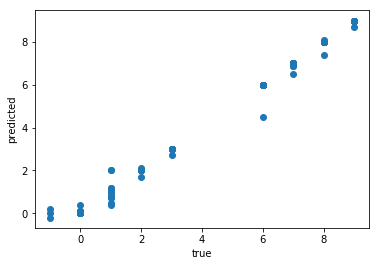

mean_absolute_error test-error: 0.069953
mean_squared_error test-error: 0.161595


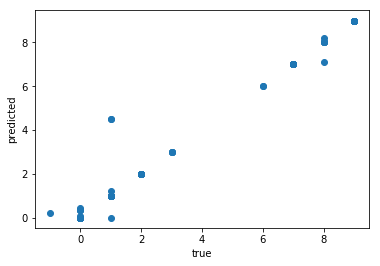

In [20]:
for name, y_predict, y_true in zip(["train", "test"],[y_train_predict, y_test_predict], [y_train, y_test]):
    # print(name, len(y_predict), len(y_true))
    print("mean_absolute_error %s-error: %f" % (name, mean_absolute_error(y_predict, y_true)))
    print("mean_squared_error %s-error: %f" % (name, mean_squared_error(y_predict, y_true)))
    plt.scatter(y_true, y_predict)
    plt.xlabel("true")
    plt.ylabel("predicted")
    plt.show()

In [ ]:
for i in zip([1,2],[2,2]): 
    print(i)